In this notebook, we'll leverage the pubically available <a href="https://www.kaggle.com/datasets/mirichoi0218/insurance" target=blank >Medical Cost dataset</a> available from Kaggle and <a href="https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv" target=blank>hosted on GitHub</a>.

In [18]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [20]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the `get_dummies()` method in pandas.

It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.

In [21]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [22]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [23]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [24]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [26]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) 

In [27]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 9061.2158 - mae: 9061.2158
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7857.7197 - mae: 7857.7197
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7588.8125 - mae: 7588.8125
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7671.5005 - mae: 7671.5005
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7657.9536 - mae: 7657.9536
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7533.7715 - mae: 7533.7715
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7578.1748 - mae: 7578.1748
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7796.4360 - mae: 7796.4360
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 7570.7300 - mae: 7570.7300
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7731.3882 - mae: 7731.3882

34/34 [==============================] - 0s 3ms/step - loss: 7140.1245 - mae: 7140.1245
Epoch 83/100
34/34 [==============================] - 0s 3ms/step - loss: 7452.8071 - mae: 7452.8071
Epoch 84/100
34/34 [==============================] - 0s 3ms/step - loss: 7366.3799 - mae: 7366.3799
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 7539.6025 - mae: 7539.6025
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 7480.4292 - mae: 7480.4292
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 7354.6636 - mae: 7354.6636
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 7315.6519 - mae: 7315.6519
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 7520.6973 - mae: 7520.6973
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 6999.6367 - mae: 6999.6367
Epoch 91/100
34/34 [==============================] - 0s 3ms/step - loss: 7214.4736 - mae: 7214.4736
Epo

In [28]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8829.7393 - mae: 8829.7393


[8829.7392578125, 8829.7392578125]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

* Increasing the number of layers (2 -> 3).
* Increasing the number of units in each layer (except for the output layer).
* Changing the optimizer (from SGD to Adam).

Everything else will stay the same.

In [29]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [30]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4866.5869 - mae: 4866.5869


[4866.5869140625, 4866.5869140625]

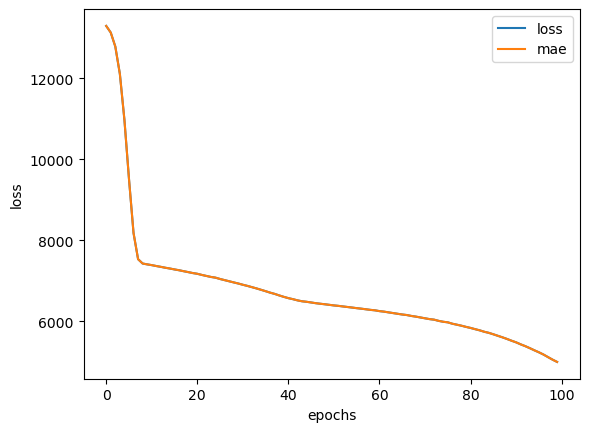

In [31]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

In [43]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

Text(0.5, 0, 'epochs')

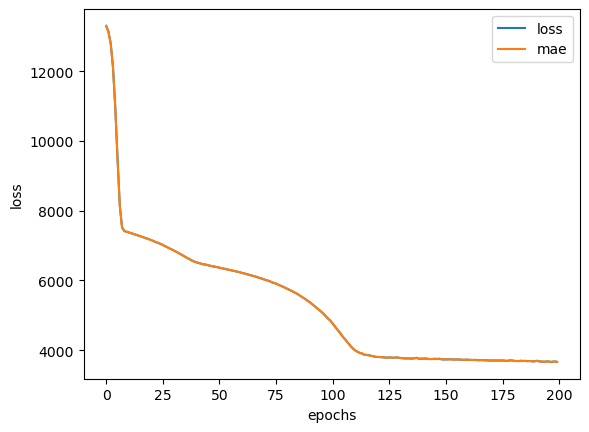

In [44]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [45]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3483.7537 - mae: 3483.7537


[3483.753662109375, 3483.753662109375]

### Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* Feature scaling:
  * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
  * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
  * Which one should you use?
    * With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.
    
    We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it as well.

In [46]:

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [47]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:ylabel='Frequency'>

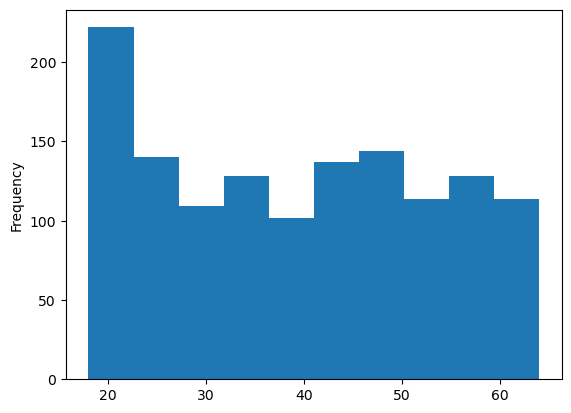

In [50]:
 insurance['age'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

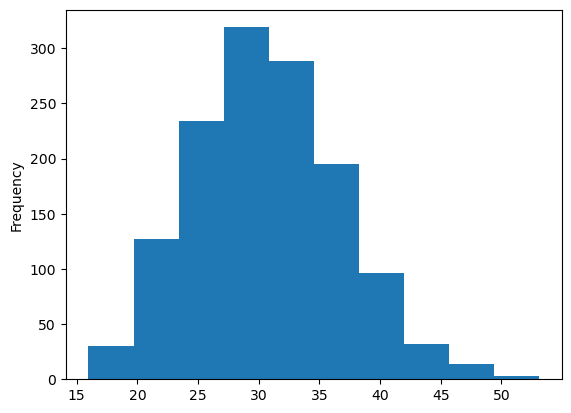

In [51]:
 insurance['bmi'].plot(kind = 'hist')

Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

* make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:
  * MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
  * OneHotEncoder - one hot encode the non-numerical columns.

In [52]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Now we've normalized it and one-hot encoding it, what does our data look like now?

In [53]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [54]:

# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [55]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [56]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [57]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3169.5000 - mae: 3169.5000
